In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#question1

In [2]:
xs = []
ft = []
for i in range (0,100):
    ystemp = []
    fttemp = []
    xt =  np.random.uniform(0.0,5.0,20)
    for j in range (0,20):
        eps = np.random.normal(0,1)
        yst = 2*np.sin(1.5*xt[j]) + eps
        fts = 2*np.sin(1.5*xt[j])
        ystemp.insert(j,yst)
        fttemp.insert(j,fts)
    ys = np.array(ystemp)
    ft.insert(i,np.array(fttemp))
    xs.insert(i,[xt,ys])



In [3]:
z1 = []
z3 = []
z5 = []
for k in range (0,100):
    ztemp1 = np.polyfit(xs[k][0],xs[k][1],1)
    ztemp3 = np.polyfit(xs[k][0],xs[k][1],3)
    ztemp5 = np.polyfit(xs[k][0],xs[k][1],5)
    p1 = np.poly1d(ztemp1)
    p3 = np.poly1d(ztemp3)
    p5 = np.poly1d(ztemp5)
    z1.insert(k,p1)
    z3.insert(k,p3)
    z5.insert(k,p5)

In [4]:
#mean
p1m = np.poly1d([])
p3m = np.poly1d([])
p5m = np.poly1d([])
for k in range (0,100):
    p1m = p1m+z1[k]/100
    p3m = p3m+z3[k]/100
    p5m = p5m+z5[k]/100


In [5]:
xt =  np.random.uniform(0.0,5.0,20)
#bias
sum1 = 0
sum3 = 0
sum5 = 0
for k in range (0,20):
    t = xt[k]
    sum1 = sum1 + np.square(p1m(t)- 2*np.sin(1.5*t))/20
    sum3 = sum3 + np.square(p3m(t)- 2*np.sin(1.5*t))/20
    sum5 = sum5 + np.square(p5m(t)- 2*np.sin(1.5*t))/20
bias1 = np.sqrt(sum1)
bias3 = np.sqrt(sum3)
bias5 = np.sqrt(sum5)

In [6]:
#variance
varsum1 = 0
varsum3 = 0
varsum5 = 0
for t in range (0,20):
    for i in range (0,100):
        varsum1 = varsum1 + np.square(z1[i](xt[t])-p1m(xt[t]))
        varsum3 = varsum3 + np.square(z3[i](xt[t])-p3m(xt[t]))
        varsum5 = varsum5 + np.square(z5[i](xt[t])-p5m(xt[t]))
var1 = varsum1/(20*100)
var3 = varsum3/(20*100)
var5 = varsum5/(20*100)

In [7]:
error1 = np.square(bias1) + var1
error3 = np.square(bias3) + var3
error5 = np.square(bias5) + var5


In [8]:

print(error1,error3,error5)
print(var1,var3,var5)
print(bias1,bias3,bias5)

1.5656446860979343 0.3781181128166481 0.9237194481068235
0.2578186602143788 0.24752201515859631 0.913283004815133
1.1436022148822358 0.36138082082209594 0.10215891195431964


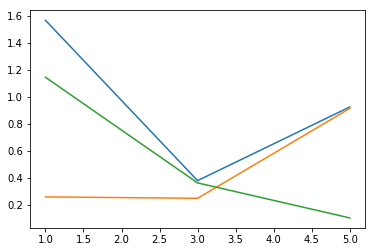

In [9]:
plt.plot([1,3,5],[error1,error3,error5])
plt.plot([1,3,5],[var1,var3,var5])
plt.plot([1,3,5],[bias1,bias3,bias5])

In [10]:
#question2
train = []
valid = []
for i in range (0,10):
    ystemp = []
    xt =  np.random.uniform(0.0,5.0,100)
    for j in range (0,100):
        eps = np.random.normal(0,1)
        yst = 2*np.sin(1.5*xt[j]) + eps
        fts = 2*np.sin(1.5*xt[j])
        ystemp.insert(j,yst)       
    ys = np.array(ystemp)
    if(i<5):
        train.insert(i,[xt,ys])
    if(i>=5):
        t = i-5
        valid.insert(t,[xt,ys])


In [11]:
z1 = []
z3 = []
z5 = []
for k in range (0,5):
    ztemp1 = np.polyfit(train[k][0],train[k][1],1)
    ztemp3 = np.polyfit(train[k][0],train[k][1],3)
    ztemp5 = np.polyfit(train[k][0],train[k][1],5)
    p1 = np.poly1d(ztemp1)
    p3 = np.poly1d(ztemp3)
    p5 = np.poly1d(ztemp5)
    z1.insert(k,p1)
    z3.insert(k,p3)
    z5.insert(k,p5)

In [12]:
#mean square error for validation data
sqrsum1 = 0
for i in range (0,5):
    for t in range (0,100):
        for m in range (0,5):
            sqrsum1 = sqrsum1 + np.square(valid[i][1][t] - z1[m](valid[i][0][t]))
meansquare1 = sqrsum1/(5*5*100)
sqrsum3 = 0
for i in range (0,5):
    for t in range (0,100):
        for m in range (0,5):
            sqrsum3 = sqrsum3 + np.square(valid[i][1][t] - z3[m](valid[i][0][t]))
meansquare3 = sqrsum3/(5*5*100)
sqrsum5 = 0
for i in range (0,5):
    for t in range (0,100):
        for m in range (0,5):
            sqrsum5 = sqrsum5 + np.square(valid[i][1][t] - z5[m](valid[i][0][t]))
meansquare5 = sqrsum5/(5*5*100)


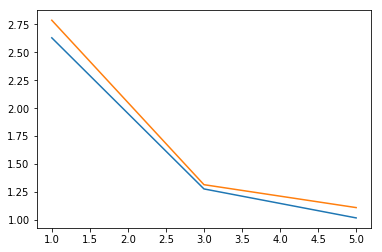

In [13]:
#mean square error for training data
sqrsum1 = 0
for i in range (0,5):
    for t in range (0,100):
        for m in range (0,5):
            sqrsum1 = sqrsum1 + np.square(train[i][1][t] - z1[m](train[i][0][t]))
trainmeansquare1 = sqrsum1/(5*5*100)
sqrsum3 = 0
for i in range (0,5):
    for t in range (0,100):
        for m in range (0,5):
            sqrsum3 = sqrsum3 + np.square(train[i][1][t] - z3[m](train[i][0][t]))
trainmeansquare3 = sqrsum3/(5*5*100)
sqrsum5 = 0
for i in range (0,5):
    for t in range (0,100):
        for m in range (0,5):
            sqrsum5 = sqrsum5 + np.square(train[i][1][t] - z5[m](train[i][0][t]))
trainmeansquare5 = sqrsum5/(5*5*100)
plt.plot([1,3,5],[meansquare1,meansquare3,meansquare5])
plt.plot([1,3,5],[trainmeansquare1,trainmeansquare3,trainmeansquare5])

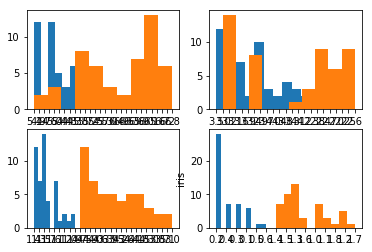

In [14]:
#question 3
with open ("/Users/asus-/iris.data", "r") as myfile:
    data = myfile.readlines()
data = [x.strip() for x in data] 
data1 = []
twoclass = []
setosa = []
versicolor = []
for element in data:
    arr = element.split(',')
    data1.append(arr)
for element in data1:
    if(element[4] == 'Iris-setosa'):
        setosa.append(element)
    if(element[4] == 'Iris-versicolor'):
       versicolor.append(element)
    if(element[4] == 'Iris-setosa' or element[4] == 'Iris-versicolor'):
        twoclass.append(element)
coloumn1s = []
coloumn2s = []
coloumn3s = []
coloumn4s = []
coloumn1v = []
coloumn2v = []
coloumn3v = []
coloumn4v = []
for element in setosa:
    coloumn1s.append(element[0])
    coloumn2s.append(element[1])
    coloumn3s.append(element[2])
    coloumn4s.append(element[3])
for element in versicolor:
    coloumn1v.append(element[0])
    coloumn2v.append(element[1])
    coloumn3v.append(element[2])
    coloumn4v.append(element[3])
    
plt.subplot(2,2,1)
plt.hist(coloumn1s, bins=10)
plt.hist(coloumn1v, bins=10)
plt.subplot(2,2,2)
plt.hist(coloumn2s, bins=10)
plt.hist(coloumn2v, bins=10)
plt.subplot(2,2,3)
plt.hist(coloumn3s, bins=10)
plt.hist(coloumn3v, bins=10)
plt.subplot(2,2,4)
plt.hist(coloumn4s, bins=10)
plt.hist(coloumn4v,bins=10)
plt.ylabel('iris');

In [15]:
training = []
validation = []
for element in twoclass:
    x = np.random.uniform(0.0,1.0,1)
    if(x>0.5):
        training.append(element)
    else:
        validation.append(element)


In [16]:
#means
msetosa = []
squant = 0
ssum0 = 0
ssum1 = 0
ssum2 = 0
ssum3 = 0
mversi = []
vquant = 0
vsum0 = 0
vsum1 = 0
vsum2 = 0
vsum3 = 0
for element in training:
    if(element[4] == 'Iris-setosa'):
        ssum0 = ssum0 + float(element[0])
        ssum1 = ssum1 + float(element[1])
        ssum2 = ssum2 + float(element[2])
        ssum3 = ssum3 + float(element[2])
        squant += 1
    elif (element[4] == 'Iris-versicolor'):
        vsum0 = vsum0 + float(element[0])
        vsum1 = vsum1 + float(element[1])
        vsum2 = vsum2 + float(element[2])
        vsum3 = vsum3 + float(element[3])
        vquant += 1
msetosa.insert(0,ssum0/squant)
msetosa.insert(1,ssum1/squant)
msetosa.insert(2,ssum2/squant)
msetosa.insert(3,ssum3/squant)
mversi.insert(0,vsum0/vquant)
mversi.insert(1,vsum1/vquant)
mversi.insert(2,vsum2/vquant)
mversi.insert(3,vsum3/squant)


In [17]:
#variance
vsetosa = []
vversi = []
ssum0 = 0
ssum1 = 0
ssum2 = 0
ssum3 = 0
vsum0 = 0
vsum1 = 0
vsum2 = 0
vsum3 = 0
vquant = 0
squant = 0
for element in training:
    if(element[4] == 'Iris-setosa'):
        ssum0 = ssum0 + np.square(float(element[0])- msetosa[0])  
        ssum1 = ssum1 + np.square(float(element[1])- msetosa[1])
        ssum2 = ssum2 + np.square(float(element[2])- msetosa[2])
        ssum3 = ssum3 + np.square(float(element[3])- msetosa[3])
        squant += 1
    elif (element[4] == 'Iris-versicolor'):
        vsum0 = vsum0 + np.square(float(element[0])- mversi[0]) 
        vsum1 = vsum1 + np.square(float(element[1])- mversi[1])
        vsum2 = vsum2 + np.square(float(element[2])- mversi[2])
        vsum3 = vsum3 + np.square(float(element[3])- mversi[3])
        vquant += 1

vsetosa.insert(0,ssum0/squant)
vsetosa.insert(1,ssum1/squant)
vsetosa.insert(2,ssum2/squant)
vsetosa.insert(3,ssum3/squant)
vversi.insert(0,vsum0/vquant)
vversi.insert(1,vsum1/vquant)
vversi.insert(2,vsum2/vquant)
vversi.insert(3,vsum3/squant)


In [18]:

def g0setosa(x):
    y = (1/(np.sqrt(2*np.pi*vsetosa[0])))*np.exp(-1*np.square((float(x)-msetosa[0])/(2*vsetosa[0])))
    return y
def g1setosa(x):
    y = (1/(np.sqrt(2*np.pi*vsetosa[1])))*np.exp(-1*np.square((float(x)-msetosa[1])/(2*vsetosa[1])))
    return y
def g2setosa(x):
    y = (1/(np.sqrt(2*np.pi*vsetosa[2])))*np.exp(-1*np.square((float(x)-msetosa[2])/(2*vsetosa[2])))
    return y
def g3setosa(x):
    y = (1/(np.sqrt(2*np.pi*vsetosa[3])))*np.exp(-1*np.square((float(x)-msetosa[3])/(2*vsetosa[3])))
    return y
                                                 
def g0versi(x):
    y = (1/(np.sqrt(2*np.pi*vversi[0])))*np.exp(-1*np.square((float(x)-mversi[0])/(2*vversi[0])))
    return y
def g1versi(x):
    y = (1/(np.sqrt(2*np.pi*vversi[1])))*np.exp(-1*np.square((float(x)-mversi[1])/(2*vversi[1])))
    return y
def g2versi(x):
    y = (1/(np.sqrt(2*np.pi*vversi[2])))*np.exp(-1*np.square((float(x)-mversi[2])/(2*vversi[2])))
    return y
def g3versi(x):
    y = (1/(np.sqrt(2*np.pi*vversi[3])))*np.exp(-1*np.square((float(x)-mversi[3])/(2*vversi[3])))
    return y


In [19]:
true0 = 0;
false0 = 0;
true1 = 0;
false1 = 0;
true2 = 0;
false2 = 0;
true3 = 0;
false3 = 0;
    
for element in validation:
    y0s = g0setosa(element[0])
    y1s = g1setosa(element[1])
    y2s = g2setosa(element[2])
    y3s = g3setosa(element[3])
    y0v = g0versi(element[0])
    y1v = g1versi(element[1])
    y2v = g2versi(element[2])
    y3v = g3versi(element[3])
    
    
    if(y0s>y0v):
        if(element[4] == 'Iris-setosa'):
            true0+=1
        else:
            false0+=1
    else:
        if(element[4] == 'Iris-versicolor'):
            true0+=1
        else:
            false0+=1
    
    if(y1s>y1v):
        if(element[4] == 'Iris-setosa'):
            true1+=1
        else:
            false1+=1
    else:
        if(element[4] == 'Iris-versicolor'):
            true1+=1
        else:
            false1+=1
    
    if(y2s>y2v):
        if(element[4] == 'Iris-setosa'):
            true2+=1
        else:
            false2+=1
    else:
        if(element[4] == 'Iris-versicolor'):
            true2+=1
        else:
            false2+=1
    
    if(y3s>y3v):
        if(element[4] == 'Iris-setosa'):
            true3+=1
        else:
            false3+=1
    else:
        if(element[4] == 'Iris-versicolor'):
            true3+=1
        else:
            false3+=1
error0 = false0/(true0+false0)
error1 = false1/(true1+false1)
error2 = false2/(true2+false2)
error3 = false3/(true3+false3)

print(error0,error1,error2,error3)

0.14893617021276595 0.1276595744680851 0.0425531914893617 0.3404255319148936
